<a href="https://colab.research.google.com/github/kerdokurs/ids_project/blob/master/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS Project

2021 on andmed ainult kuni 30 aprillini

2019 avati rattaringlus 8 juunil


In [1]:
# Check for source in the README file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from itertools import cycle, islice

In [2]:
# Import the weather data
# Check for source in the README file
#   - Use English translations for the columns
#   - Parse date as datetime
#   - Ignore the first row now that we have our own column names
#   - Parse all other columns automatically

weather_data = pd.read_csv(
  "data/weather_2019_2021.csv",
  names=["time", "temperature", "humidity", "pressure", "wind_speed", "wind_direction", "precipitation"],
  na_values=" ",
  parse_dates=["time"],
  skiprows=1,
)

In [3]:
# Clean the weather dataset

weather_data = weather_data.drop(columns=["pressure", "wind_direction"])

In [4]:
print(f"Dataset size: {weather_data.shape}")
print(weather_data.dtypes)
weather_data.head()

Dataset size: (247969, 5)
time             datetime64[ns]
temperature             float64
humidity                float64
wind_speed              float64
precipitation           float64
dtype: object


,time,temperature,humidity,wind_speed,precipitation
0,2019-01-01 00:00:00,-1.237364,88.136591,6.090115,0.0
1,2019-01-01 00:05:00,-1.218086,87.843514,6.113306,0.0
2,2019-01-01 00:10:00,-1.212630,87.741134,6.483215,0.0
3,2019-01-01 00:15:00,-1.193596,87.252225,7.569293,0.0
4,2019-01-01 00:20:00,-1.171625,87.013905,7.577561,0.0


In [5]:
# Import bike data
bike_data_2019 = pd.read_csv("data/rattaringlus/2019.csv")
bike_data_2020 = pd.read_csv("data/rattaringlus/2020.csv")
bike_data_2021 = pd.read_csv("data/rattaringlus/2021.csv")

In [6]:
# Clean bike data by only including data in daterange may 1st to oct 31st
#bike_data_2019 = bike_data_2019[(bike_data_2019["unlockedat"] >= "2019-05-01") & (bike_data_2019["unlockedat"] <= "2019-10-31")]
#bike_data_2020 = bike_data_2020[(bike_data_2020["unlockedat"] >= "2020-05-01") & (bike_data_2020["unlockedat"] <= "2020-10-31")]
#bike_data_2021 = bike_data_2021[(bike_data_2021["unlockedat"] >= "2021-05-01") & (bike_data_2021["unlockedat"] <= "2021-10-31")]

bike_data_2019 = bike_data_2019.append(bike_data_2020)
bike_data = bike_data_2019.append(bike_data_2021)

bike_data = bike_data.sort_values(by="unlockedat")

In [7]:
# Import covid data
covid_data_raw = pd.read_csv("data/covid.csv")

In [8]:
# Clean covid data
covid_data_raw = covid_data_raw.sort_values(by="StatisticsDate")
#covid_data_2020 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2020-05-01") & (covid_data_raw["StatisticsDate"] <= "2020-10-31")]
#covid_data_2021 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2021-05-01") & (covid_data_raw["StatisticsDate"] <= "2021-10-31")]
covid_dat = covid_data_raw[((covid_data_raw["StatisticsDate"] < "2021-05-01"))]
covid_dat
covid_data = covid_dat.copy()

Text(0.5, 1.0, '2020 Corona tests')

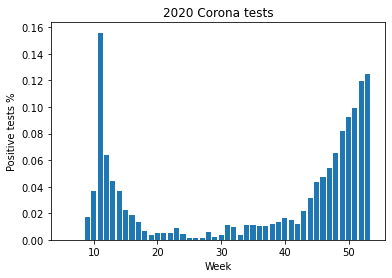

In [12]:
#VISUALISE DATA BY WEEK NUMBER AS PERCENTAGE
covid_data["StatisticsDate"] = covid_data["StatisticsDate"].astype(np.datetime64)
covid_data['week_number_of_year']=covid_data["StatisticsDate"].dt.isocalendar().week
covid_data["year"] = covid_data["StatisticsDate"].dt.isocalendar().year
"-------*******-------"
alltst= covid_data.groupby(["week_number_of_year","year"])["ResultValue"].count().rename('count').to_frame().reset_index()
#nakatumiste_data = covid_data.groupby(["week_number_of_year", "year"])["ResultValue"].value_counts().rename('count').to_frame().reset_index()
onlypos = covid_data[covid_data.ResultValue == "P"]
onlypos = onlypos.groupby(["week_number_of_year","year"])["ResultValue"].count().rename('countpos').to_frame().reset_index()
onlypos
alltst["merg"]= alltst["year"].astype(str) + "-" + alltst["week_number_of_year"].astype(str)
onlypos["merg"] = onlypos["year"].astype(str) + "-" +onlypos["week_number_of_year"].astype(str)
what = pd.merge(alltst, onlypos, how="outer")
what.fillna(0, inplace=True)
what['Result'] = what['countpos']/what['count']
what2020 = what[what.year == 2020]
what2021 = what[what.year == 2021]
#2020 covid positive results average by week
plt.bar(what2020["week_number_of_year"],what2020["Result"])
plt.xlabel("Week")
plt.ylabel("Positive tests %")
plt.title("2020 Corona tests")
#iga nädala positiivsete osakaal

Text(0.5, 1.0, '2021 Corona tests until end of April')

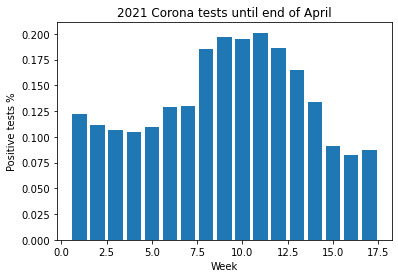

In [13]:
#2021 covid positive results average by week
plt.bar(what2021["week_number_of_year"],what2021["Result"])
plt.xlabel("Week")
plt.ylabel("Positive tests %")
plt.title("2021 Corona tests until end of April")

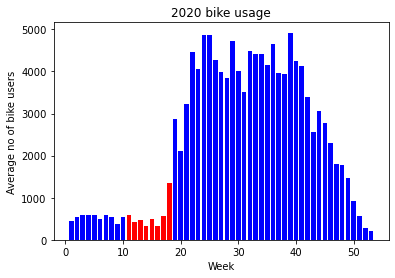

In [41]:
#same thing with bike data
bike_data_all_weeks = bike_data.copy()
bike_data_all_weeks["unlockedat"] = bike_data_all_weeks["unlockedat"].astype(np.datetime64)
bike_data_all_weeks["week"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().week
bike_data_all_weeks["year"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().year

"--------*******--------"
# no of bike rides in 2020 and 2021
allb = bike_data_all_weeks.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
allb20 = allb[allb.year == 2020]
allb21 = allb[allb.year == 2021]
weeks = list(range(1, 54))
colors = ["red" if i in range(11,19) else "blue" for i in weeks]
plt.bar(allb20["week"],allb20["count"]/7,color=colors)
#punane on eriolukord
plt.xlabel("Week")
plt.ylabel("Average no of bike users")
plt.title("2020 bike usage")
plt.show()

Text(0.5, 1.0, '2020 bike usage until end of April')

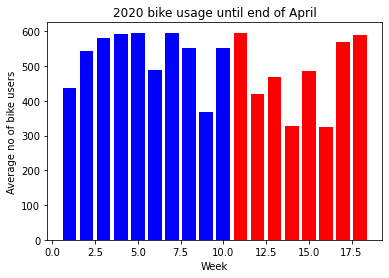

In [48]:
#et vorrelda 2021ga
allb20apr = bike_data_all_weeks[bike_data_all_weeks["unlockedat"] < "2020-05-01"].copy()
allb20apr["unlockedat"] = allb20apr["unlockedat"].astype(np.datetime64)
allb20apr["week"] = allb20apr["unlockedat"].dt.isocalendar().week
allb20apr["year"] = allb20apr["unlockedat"].dt.isocalendar().year

"--------*******--------"
allb = allb20apr.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
allb20apr = allb[allb.year == 2020]
weeks = list(range(1, 19))
colors = ["red" if i in range(11,19) else "blue" for i in weeks]
plt.bar(allb20apr["week"],allb20apr["count"]/7,color=colors)
plt.xlabel("Week")
plt.ylabel("Average no of bike users")
plt.title("2020 bike usage until end of April")
#punane on eriolukord

Text(0.5, 1.0, '2021 bike usage until end of April')

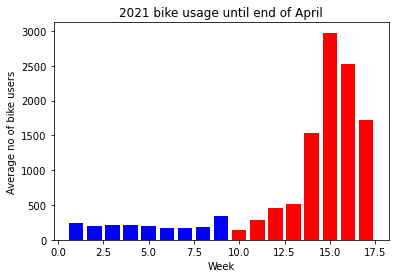

In [44]:
#ka 2021ga vordluseks
weeks = list(range(1, 18))
colors = ["red" if i in range(10,18) else "blue" for i in weeks]
plt.bar(allb21["week"],allb21["count"]/7,color=colors)
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.xlabel("Week")
plt.ylabel("Average no of bike users")
plt.title("2021 bike usage until end of April")
#punane on karmimad piirangud

Text(0.5, 1.0, '2020 weather')

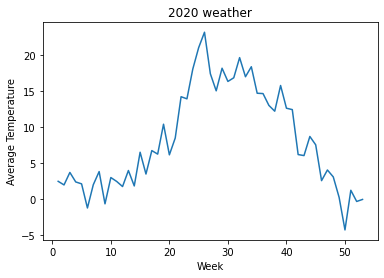

In [42]:
#same with weather
wwd = weather_data
wwd["time"] = weather_data["time"].astype(np.datetime64)
wwd["week"] = wwd["time"].dt.isocalendar().week
wwd["year"]=  wwd["time"].dt.isocalendar().year
wwd20 = wwd[wwd["year"] == 2020].groupby(["week"])["temperature"].mean().rename('mean').to_frame().reset_index()
wwd21 = wwd[wwd["year"] == 2021].groupby(["week"])["temperature"].mean().rename('mean').to_frame().reset_index()

plt.plot(wwd20["week"], wwd20["mean"])
plt.xlabel("Week")
plt.ylabel("Average Temperature")
plt.title("2020 weather")


Text(0, 0.5, 'Y axis label')

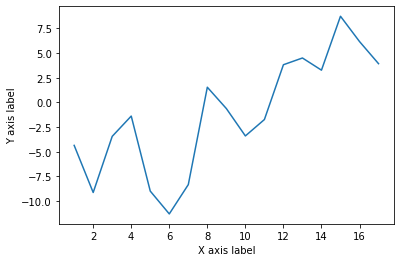

In [270]:
plt.plot(wwd21["week"], wwd21["mean"])
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.xlabel("Week")
plt.ylabel("Average Temperature")
plt.title("2021 weather until end of April")

<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='unlockedat_day'>

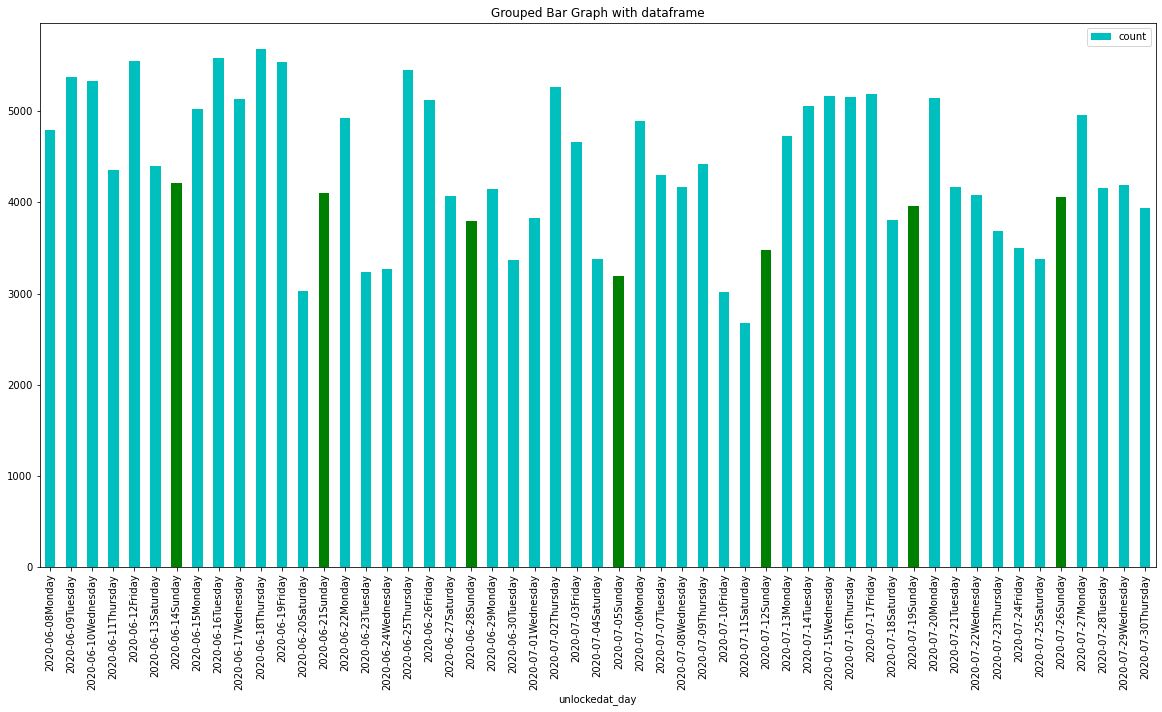

In [378]:
#okei kuna 2019 data ainult alates juunist
#teen hoopis suvekuude vordluse 19 vs 20
#8 juuni avati rattaringlus
bike_data_weekDays = bike_data.copy()

bike_data_weekDays["unlockedat"] = bike_data_weekDays["unlockedat"].astype(np.datetime64)
bike_data_weekDays["unlockedat_day"] = bike_data_weekDays.unlockedat.dt.date.astype(str)+ bike_data_weekDays["unlockedat"].dt.strftime('%A') 
bike_data20 = bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2020-06-08") & (bike_data_weekDays["unlockedat"] <= "2020-07-30")]
#bike_data21 = bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2021-03-11")]
bike_data1920 =bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2019-06-08") & (bike_data_weekDays["unlockedat"] <= "2019-07-30")]
#bike_data1921 =bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2019-03-11") & (bike_data_weekDays["unlockedat"] <= "2019-05-30")]
"----****----"
bike_data20 = bike_data20.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
#bike_data21 = bike_data21.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
bike_data1920 = bike_data1920.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
#bike_data1921 = bike_data1921.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()


#plt.bar(bike_data20["week_no_year"], bike_data20["count"])
#plt.xlabel("X axis label")
#plt.ylabel("Y axis label")


In [386]:
wth = weather_data.copy()
wth["time"] = weather_data["time"].astype(np.datetime64)
wth["unlockedat_day"] = wth.time.dt.date.astype(str)+ wth["time"].dt.strftime('%A') 
wth20 = wth[(wth["time"] >= "2020-06-08") & (wth["time"] <= "2020-07-30")]
wth19 =wth[(wth["time"] >= "2019-06-08") & (wth["time"] <= "2019-07-30")]

,time,temperature,humidity,wind_speed,precipitation,week,year,unlockedat_day
0,2019-01-01 00:00:00,-1.237364,88.136591,6.090115,0.0,1,2019,2019-01-01Tuesday
1,2019-01-01 00:05:00,-1.218086,87.843514,6.113306,0.0,1,2019,2019-01-01Tuesday
2,2019-01-01 00:10:00,-1.212630,87.741134,6.483215,0.0,1,2019,2019-01-01Tuesday
3,2019-01-01 00:15:00,-1.193596,87.252225,7.569293,0.0,1,2019,2019-01-01Tuesday
4,2019-01-01 00:20:00,-1.171625,87.013905,7.577561,0.0,1,2019,2019-01-01Tuesday
...,...,...,...,...,...,...,...,...
247964,2021-04-30 00:35:00,5.874293,78.252298,2.852742,0.0,17,2021,2021-04-30Friday
247965,2021-04-30 00:40:00,5.841596,78.804838,3.468670,0.0,17,2021,2021-04-30Friday
247966,2021-04-30 00:45:00,5.846684,78.970810,3.065700,0.0,17,2021,2021-04-30Friday
247967,2021-04-30 00:50:00,5.841117,78.944670,2.483133,0.0,17,2021,2021-04-30Friday


<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='unlockedat_day'>

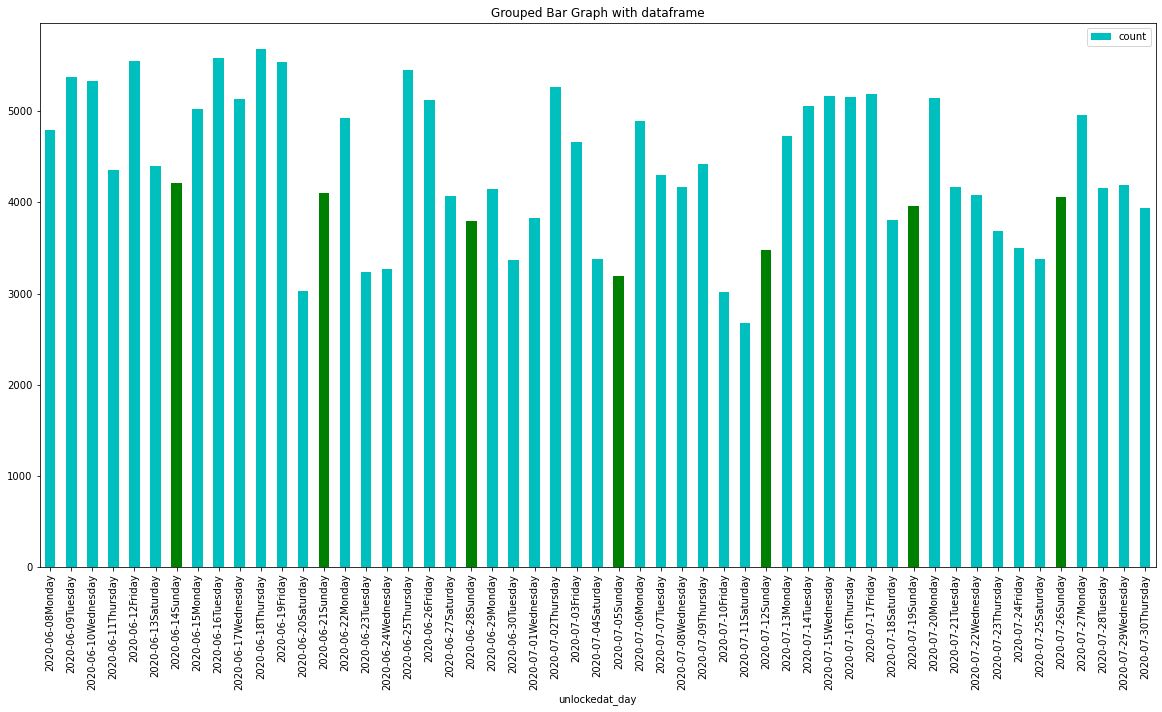

In [388]:
my_colors = list(islice(cycle(['c', 'c', 'c', 'c', 'c','c','g']), None, len(bike_data20)))
bike_data20.plot(x='unlockedat_day',
                 y="count",
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(20,10),color=my_colors)


<AxesSubplot:xlabel='unlockedat_day'>

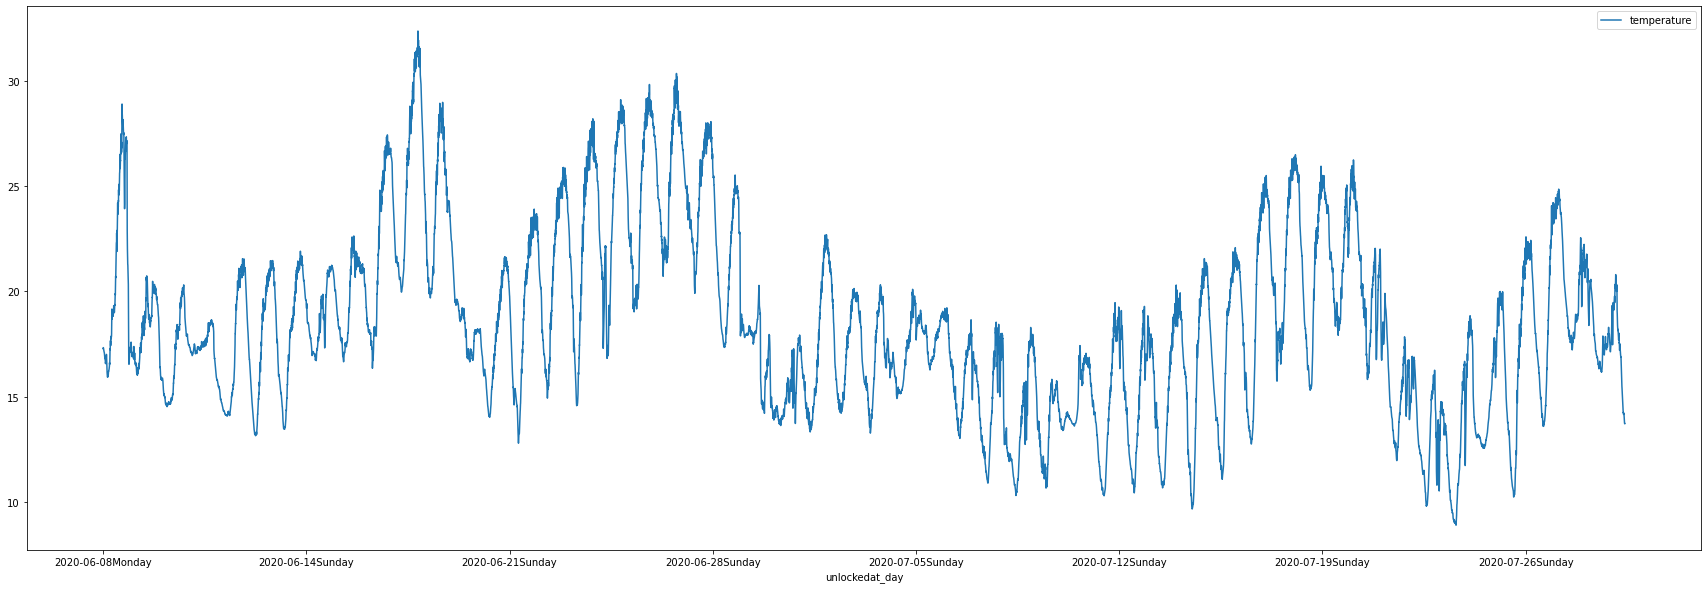

In [393]:
#siia peale v]iks panna ilmaandmed
wth20.plot(x="unlockedat_day",y="temperature",figsize=(30,10))

<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='unlockedat_day'>

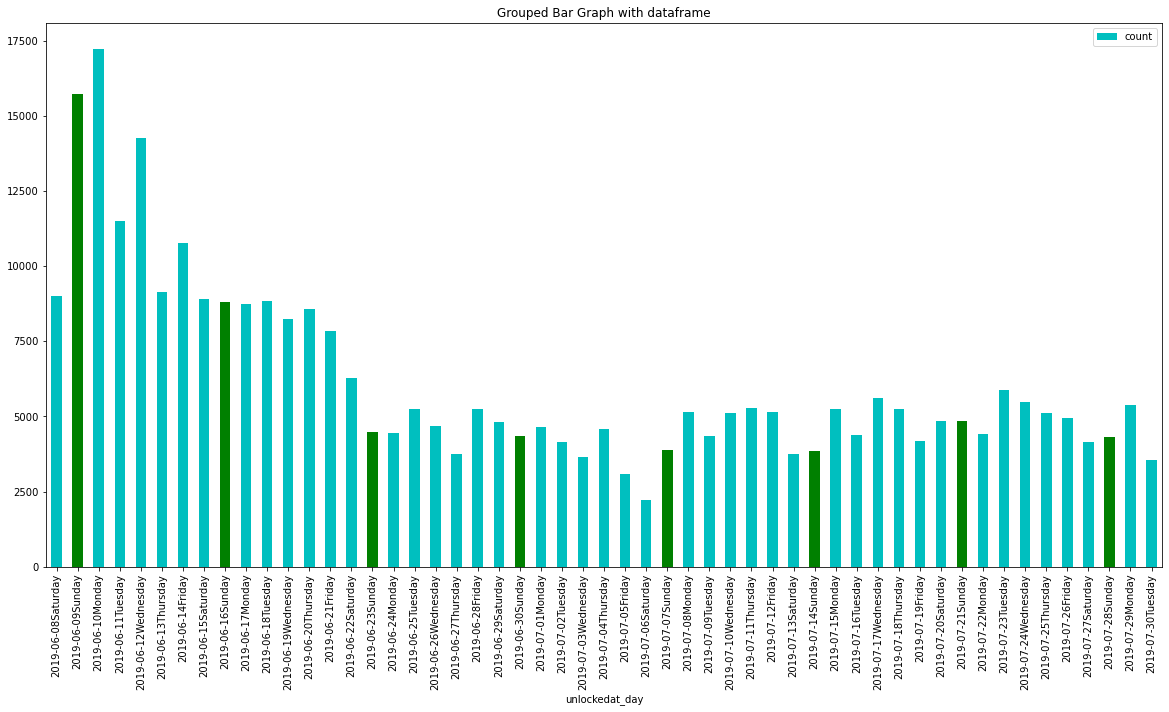

In [380]:
my_colors = list(islice(cycle(['c', 'g', 'c', 'c', 'c','c','c']), None, len(bike_data20)))
bike_data1920.plot(x='unlockedat_day',
                 y="count",
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(20,10),color = my_colors)
#8 juuni avati rattaringlus
#siia peale ka ilmaandmed

<AxesSubplot:xlabel='unlockedat_day'>

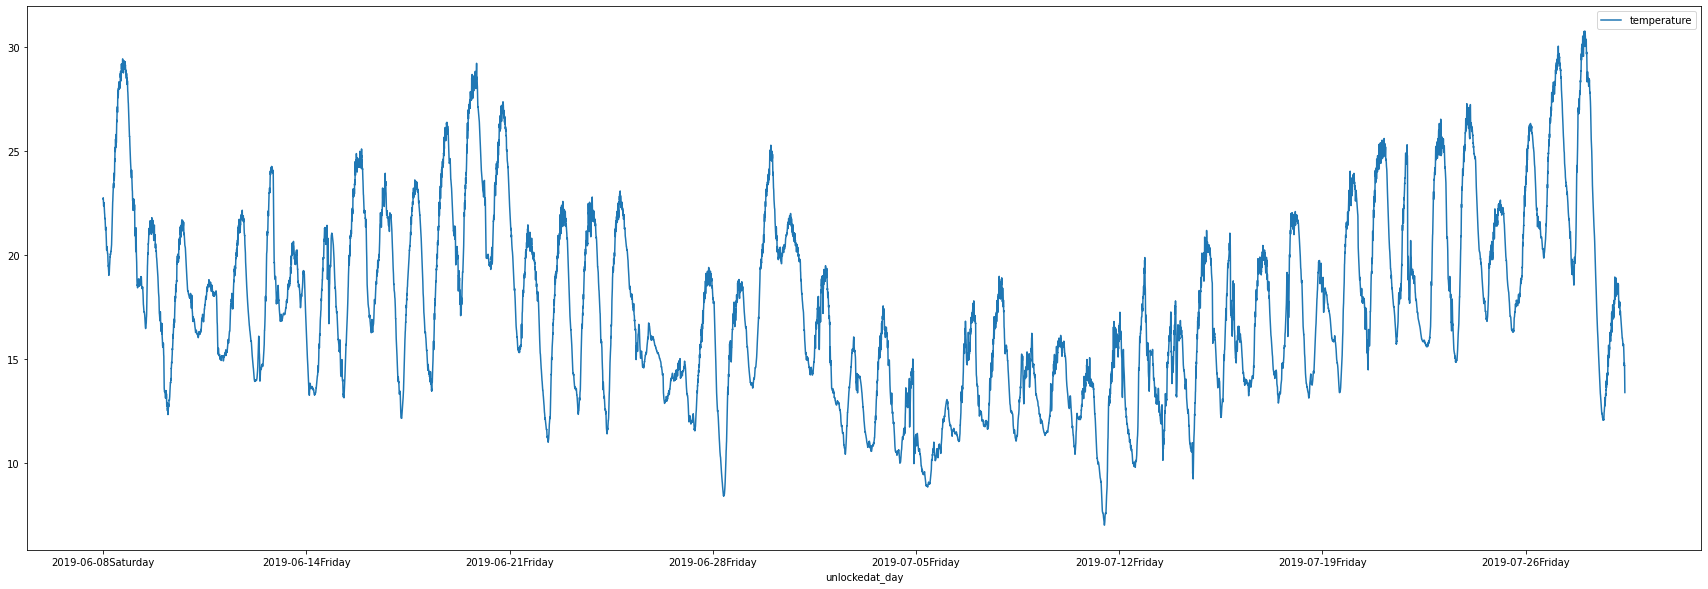

In [394]:
#siia peale v]iks panna ilmaandmed
wth19.plot(x="unlockedat_day",y="temperature",figsize=(30,10))

In [13]:
# TODO: Is there a difference between the statistics of the bike rides during and before covid
#eg 2019 and 2020/21

# --------------- Average distance pre covid
avg_dist_2019 = bike_data_2019["length"].mean()
avg_dist_2020 = bike_data_2020["length"].mean()
avg_dist_2021 = bike_data_2021["length"].mean()

avg_dist_increase = round((avg_dist_2021 / avg_dist_2019)*100 - 100, 2)

print("Average distance (km) before covid: " + str(avg_dist_2019))
print("Average distance (km) after covid (2020): " + str(avg_dist_2020))
print("Average distance (km) after covid (2021): " + str(avg_dist_2021))

print("The average distance of bikers has risen " + str(avg_dist_increase) + "% when comparing statistics from 2019 to 2021")

# --------------- Average age pre covid and post covid (are older people using more bikes to avoid other means of transportation?)

avg_age_2019 = bike_data_2019["yearOfBirth"].mean()
avg_age_2020 = bike_data_2020["yearOfBirth"].mean()
avg_age_2021 = bike_data_2021["yearOfBirth"].mean()

print("The average age of a person using citybikes in 2019 was: " + str(2021 - avg_age_2019))
print("The average age of a person using citybikes in 2020 was: " + str(2021 - avg_age_2020))
print("The average age of a person using citybikes in 2021 was: " + str(2021 - avg_age_2021))


# --------------- "Fun facts" aka longest distance driven, longest duration of unlocked bike
longest_distance = max([max(bike_data_2019["length"]), max(bike_data_2020["length"]), max(bike_data_2021["length"])])
print("Longest distance driven in the years 2019-2021 was " + str(longest_distance) + "km")

#cast unlockedattime and lockedattime columns to datetime
bike_data_2019["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2019["unlockedat"] + " " + bike_data_2019["unlockedattime"], utc=True)
bike_data_2020["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2020["unlockedat"] + " " + bike_data_2020["unlockedattime"], utc=True)
bike_data_2021["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2021["unlockedat"] + " " + bike_data_2021["unlockedattime"], utc=True)

bike_data_2019["lockedAtTimestamp"] = pd.to_datetime(bike_data_2019["lockedat"] + " " + bike_data_2019["lockedattime"], utc=True)
bike_data_2020["lockedAtTimestamp"] = pd.to_datetime(bike_data_2020["lockedat"] + " " + bike_data_2020["lockedattime"], utc=True)
bike_data_2021["lockedAtTimestamp"] = pd.to_datetime(bike_data_2021["lockedat"] + " " + bike_data_2021["lockedattime"], utc=True)

bike_data_2019["rideDuration"] = bike_data_2019["lockedAtTimestamp"] - bike_data_2019["unlockedAtTimestamp"]
bike_data_2020["rideDuration"] = bike_data_2020["lockedAtTimestamp"] - bike_data_2020["unlockedAtTimestamp"]
bike_data_2021["rideDuration"] = bike_data_2021["lockedAtTimestamp"] - bike_data_2021["unlockedAtTimestamp"]

longest_ride = max([max(bike_data_2019["rideDuration"]), max(bike_data_2020["rideDuration"]), max(bike_data_2021["rideDuration"])])
print("Longest ride of the three years was: " + str(longest_ride))




Average distance (km) before covid: 2.6539883433710036
Average distance (km) after covid (2020): 2.66533069727447
Average distance (km) after covid (2021): 2.8012340595737073
The average distance is slowly rising, this is most likely due to people preferring biking, instead of sitting in a crowded bus and increasing their risk of catching the virus.
The average distance of bikers has risen 5.55% when comparing statistics from 2019 to 2021
The average age of a person using citybikes in 2019 was: 30.988374422187917
The average age of a person using citybikes in 2020 was: 30.85136217436684
The average age of a person using citybikes in 2021 was: 33.085261402827655
It appears that more and more older people are using citybikes to get around the city, most likely to avoid public transport whenever possible.
Longest distance driven in the years 2019-2021 was 161.83km
Longest ride of the three years was: 15 days 20:37:08


In [ ]:
# TODO: Does the last 7 day data have any impact on no of bike rides
# also take weather into account
# make model ???
#date - no of bike rides
#date - 7  corona data
#date-7 avg temp??
#gotta think